In [1]:
print("Hello World ~Matt Goeckel")

Hello World ~Matt Goeckel


In [5]:
##9.3 Text-File Processing
#Sample write - mode 'w' creates the file if there isn't one already
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Goeckel 24.98\n')
    accounts.write('200 Bearcat 345.67\n')
    accounts.write('300 Green 0.00\n')
    accounts.write('400 Wick -42.16\n')
    accounts.write('500 Everest 224.62\n')

In [8]:
#Sample read - reading opens file but does not change it
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Goeckel        24.98
200       Bearcat       345.67
300       Green           0.00
400       Wick          -42.16
500       Everest       224.62


In [11]:
##9.4 Updating Text Files
#Sample update - updates can be tricky, remember to use the correct open() statement, since some can overwrite instead of update
accounts = open('accounts.txt', 'r')
temp_file = open('temp_file.txt', 'w')
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Jones', balance])
            temp_file.write(new_record + '\n')
            print("Account Edited")


Account Edited


In [12]:
#Remove - removes the associated file
import os
os.remove('accounts.txt')

In [13]:
#Rename - renames the file to something else without changing its contents
os.rename('temp_file.txt', 'mattscoolfile.txt')

In [22]:
##9.5 Serialization with JSON
#working somewhat like a dictionary
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Goeckel', 'balance': 345.67}]}

In [23]:
import json
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [24]:
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)
accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Goeckel', 'balance': 345.67}]}

In [25]:
accounts_json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Goeckel', 'balance': 345.67}]

In [26]:
accounts_json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

In [27]:
accounts_json['accounts'][1]

{'account': 200, 'name': 'Goeckel', 'balance': 345.67}

In [28]:
with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))
{
 "accounts": [
 {
 "account": 100,
 "name": "Jones",
 "balance": 24.98
 },
 {
 "account": 200,
 "name": "Goeckel",
 "balance": 345.67
 }
 ]
}

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Goeckel",
            "balance": 345.67
        }
    ]
}


{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Goeckel', 'balance': 345.67}]}

9.6 Focus on Security: pickle Serialization and Deserialization
    The pickle module can serialize objects into a specific data format
    It is specific to Python and cannot be used to communicate with apps written in other languages
    Pickle files can be hacked, so only open files if you are the source
    Not recommended but may come up if working with older code

9.7 Additional Notes Regarding Files

'r' Open a text file for reading. This is the default

'w' Open a text file for writing. Existing file contents are deleted.

'a' Open a text file for appending at the end, creating the file if it does not exist.

'r+' Open a text file reading and writing.

'w+' Open a text file reading and writing. Existing file contents are deleted.

'a+' Open a text file reading and appending at the end. New data is written at the end
of the file. If the file does not exist, it is created. 

In [31]:
##9.8 Handling Exceptions
#10 / 0     #ZeroDivision
value = int(input('Enter an integer: '))       #ValueError

ValueError: invalid literal for int() with base 10: 'hello'

In [32]:
#Try statements
while True:
# attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError: # tried to convert non-numeric value to int
        print('You must enter two integers\n')
    except ZeroDivisionError: # denominator was 0
        print('Attempted to divide by zero\n')
    else: # executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break # terminate the loop

You must enter two integers

You must enter two integers

You must enter two integers

You must enter two integers

Attempted to divide by zero

1.000 / 4.000 = 0.250


In [33]:
try:
    print('try suite with no exceptions raised')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:
    print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


In [34]:
try:
    print('try suite with exceptions raised')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError has occurred')
else:
    print('else does not execute because exceptions are in the try suite')
finally:
    print('finally always executes')

try suite with exceptions raised
a ValueError has occurred
finally always executes


In [36]:
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')

The file name you specified does not exist


9.10 - use the raise statement to indicate that a problem occured at execution time

In [38]:
##9.11 Stack unwinding and tracebacks
def isMattCool():
    checkCoolness()

def checkCoolness():
    raise Exception('An exception occured')

isMattCool()

Exception: An exception occured

In [39]:
##9.12 Intro to Data Science: Working with CSV Files
import csv
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Goeckel', 345.67])
    writer.writerow([300, 'Green', 0.00])
    writer.writerow([400, 'Bearcat', -42.16])
    writer.writerow([500, 'Hughes', 224.62])

In [40]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Goeckel       345.67
300       Green            0.0
400       Bearcat       -42.16
500       Hughes        224.62


In [41]:
import pandas as pd
df = pd.read_csv('accounts.csv', names=['account', 'name', 'balance'])
df

,account,name,balance
0,100,Jones,24.98
1,200,Goeckel,345.67
2,300,Green,0.00
3,400,Bearcat,-42.16
4,500,Hughes,224.62


In [42]:
df.to_csv('accounts_from_dataframe.csv', index=False)

In [49]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/' + 'Rdatasets/csv/carData/TitanicSurvival.csv')
#pd.set_option('precision', 2)
titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


In [47]:
titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [50]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


In [51]:
titanic.describe()

,age
count,1046.000000
mean,29.881135
std,14.413500
min,0.166700
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [52]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

In [56]:
%matplotlib inline


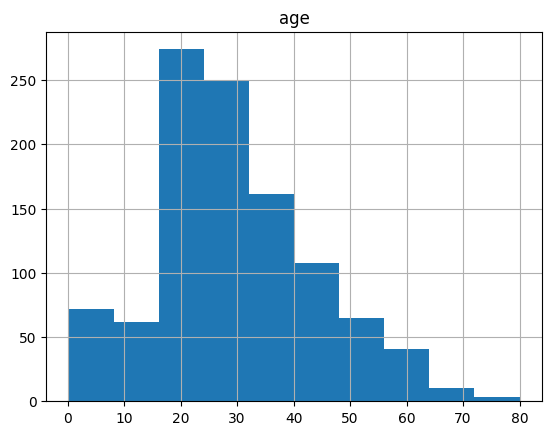

In [57]:
histogram = titanic.hist()